## Importing Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Excel File



In [76]:
excel_file_path = r'C:\Users\sushi\OneDrive\Desktop\ML Project\Assignments\230531_KaranKeer\Assignment2\AirQualityUCI.xlsx'
df = pd.read_excel(r'C:\Users\sushi\OneDrive\Desktop\ML Project\Assignments\230531_KaranKeer\Assignment2\AirQualityUCI.xlsx')
df.iloc[:,:]


#CSV file had some errors so I imported excel file

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


## Part (1) => Pre-Processing


Dealing With Nan


In [77]:
#I replaced the -200 values with NAN first and then the NAN values with column wise means.

df.replace(-200, np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().values.any()
df = df.drop(columns=['Time', 'Date'])


 Correlation matrix


In [78]:
# Calculating the correlation matrix and sorting them on basis of relation with RH

correlation_matrix = df.corr(numeric_only=True)
rh_correlation = correlation_matrix['RH'].sort_values(ascending=False)
print(rh_correlation)


RH               1.000000
NOx(GT)          0.192578
AH               0.167971
PT08.S5(O3)      0.124952
PT08.S1(CO)      0.114607
CO(GT)           0.043204
PT08.S4(NO2)    -0.032188
NMHC(GT)        -0.052794
PT08.S3(NOx)    -0.056730
C6H6(GT)        -0.061643
NO2(GT)         -0.080645
PT08.S2(NMHC)   -0.090352
T               -0.578569
Name: RH, dtype: float64


Dealing With Outliers


In [79]:
def remove_outliers_zscore(df, features, z_score_threshold=4):
    df_not_outliers = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    
    for feature in features:
        mean = df[feature].mean()
        stddev= df[feature].std()
        df_not_outliers[f'{feature}_z_score'] = (df[feature] - mean) / stddev

        # Removing outliers
        outliers = df_not_outliers[abs(df_not_outliers[f'{feature}_z_score']) > z_score_threshold]
        df_not_outliers = df_not_outliers[abs(df_not_outliers[f'{feature}_z_score']) <= z_score_threshold]

        print(f"Number of outliers removed for {feature}:", len(outliers))
        print(f"Z-Score Threshold for {feature}:", z_score_threshold)

    return df_not_outliers.drop(columns=[f'{feature}_z_score' for feature in features])


list= df.columns.tolist()
df = remove_outliers_zscore(df, features=list, z_score_threshold=5)


Number of outliers removed for CO(GT): 12
Z-Score Threshold for CO(GT): 5
Number of outliers removed for PT08.S1(CO): 0
Z-Score Threshold for PT08.S1(CO): 5
Number of outliers removed for NMHC(GT): 83
Z-Score Threshold for NMHC(GT): 5
Number of outliers removed for C6H6(GT): 3
Z-Score Threshold for C6H6(GT): 5
Number of outliers removed for PT08.S2(NMHC): 0
Z-Score Threshold for PT08.S2(NMHC): 5
Number of outliers removed for NOx(GT): 12
Z-Score Threshold for NOx(GT): 5
Number of outliers removed for PT08.S3(NOx): 10
Z-Score Threshold for PT08.S3(NOx): 5
Number of outliers removed for NO2(GT): 0
Z-Score Threshold for NO2(GT): 5
Number of outliers removed for PT08.S4(NO2): 0
Z-Score Threshold for PT08.S4(NO2): 5
Number of outliers removed for PT08.S5(O3): 0
Z-Score Threshold for PT08.S5(O3): 5
Number of outliers removed for T: 0
Z-Score Threshold for T: 5
Number of outliers removed for RH: 0
Z-Score Threshold for RH: 5
Number of outliers removed for AH: 0
Z-Score Threshold for AH: 5


## Part (2) => Using Sklearn

Splitting Training and Test data and Normalisation

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X = df.drop(columns=['RH'])  # Features
y = df['RH']  # Target variable

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Display the shape of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (7851, 12)
Shape of X_test: (1386, 12)
Shape of y_train: (7851,)
Shape of y_test: (1386,)


## Part (3) => Constructing Models

Linear regression from Scratch


Cost function


In [81]:
def cost(y_hat, y_train):
    l = (y_hat - y_train) ** 2
    cost = l.mean()
    return cost

 Initialising weights and Gradient Descent

In [82]:
# Initializing weights with zeros
W = np.zeros(X_train.shape[1])

def gradient_descent(X_train, y_train, W, learning_rate, num_epochs):
    L=[]
    for _ in range(num_epochs):
        y_hat = np.dot(X_train, W)
        errors = y_hat - y_train
        gradient = np.dot(X_train.T, errors) / len(y_train)
        W -= learning_rate * gradient
        L.append(cost(y_hat, y_train))
        
    return W,L
    

Implementation

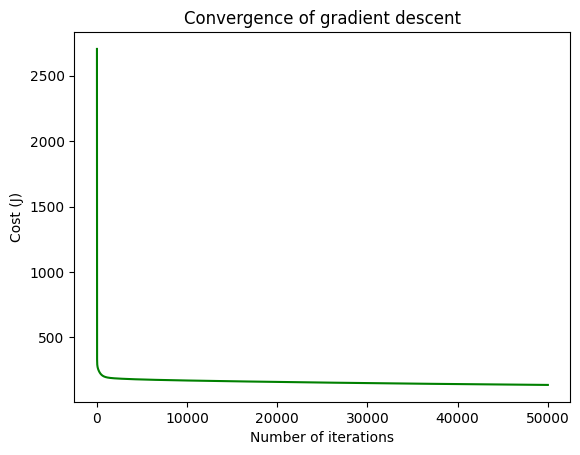

(12,)


In [83]:
# Hyperparameters
learning_rate = 0.0000003
num_epochs = 50000

#Calling Gradient descent
W,L = gradient_descent(X_train, y_train, W, learning_rate, num_epochs)

#Plotting Cost v/s Iterations
plt.plot(range(1, num_epochs + 1), L, color='g')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

y_hat_test = np.dot(X_test, W)

Using Sklearn Library

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Part (4) => Evaluation And Plotting

For Scratch Regression


Mean Squared Error on Test Set: 140.1687575623989
R2 Score: 0.5098245494114149


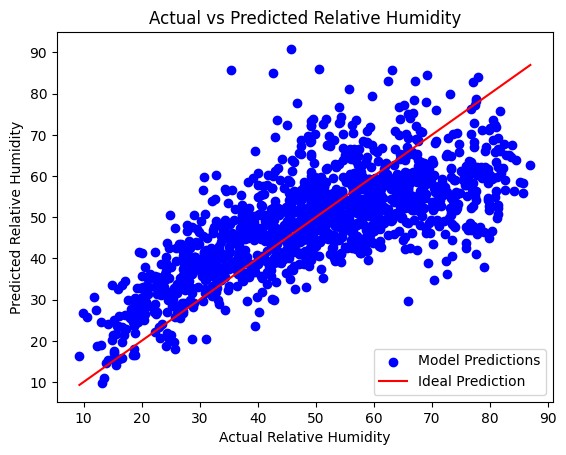

In [85]:
# Evaluating the model
mse1 = mean_squared_error(y_test, y_hat_test)
print("Mean Squared Error on Test Set:", mse1)
r2_1 = r2_score(y_test,y_hat_test)
print("R2 Score:", r2_1)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_hat_test,color='b', label="Model Predictions")
plt.xlabel("Actual Relative Humidity")
plt.ylabel("Predicted Relative Humidity")
plt.title("Actual vs Predicted Relative Humidity")
plt.legend()

# Assuming a line of perfect prediction (actual = predicted)
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  
plt.plot(x_line, y_line, color='r',  label='Ideal Prediction')
plt.legend()
plt.show()



For Regression using sklearn


Mean Squared Error on Test Set: 35.50767005171423
R2 Score: 0.8758283338624754


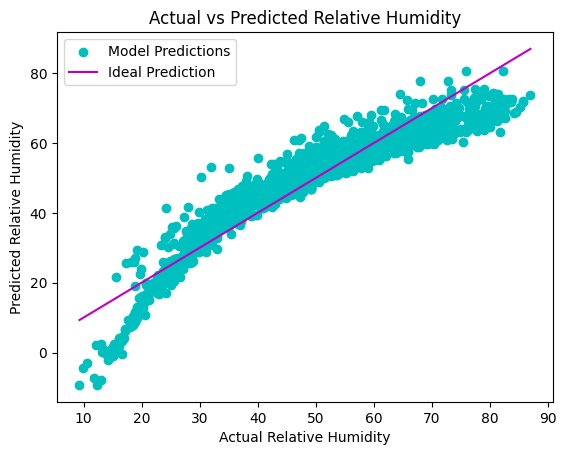

In [86]:
# Evaluate the model
mse2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse2)
r2_2 = r2_score(y_test,y_pred)
print("R2 Score:", r2_2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='c', label="Model Predictions")
plt.xlabel("Actual Relative Humidity")
plt.ylabel("Predicted Relative Humidity")
plt.title("Actual vs Predicted Relative Humidity")
plt.legend()

# Assuming a line of perfect prediction (actual = predicted)
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  
plt.plot(x_line, y_line, color='m',  label='Ideal Prediction')
plt.legend()
plt.show()



On One Plot


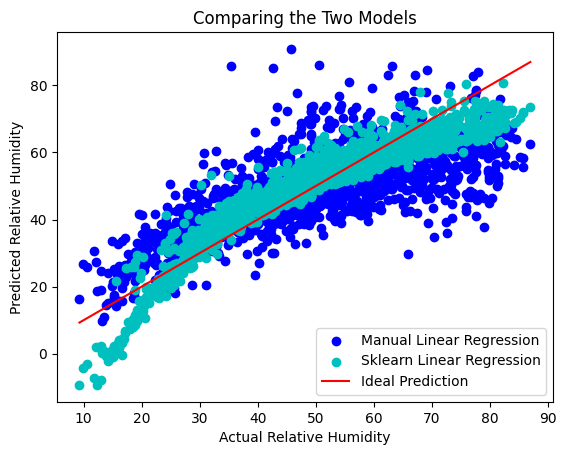

In [87]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_hat_test,color='b', label='Manual Linear Regression')
plt.xlabel("Actual Relative Humidity")
plt.ylabel("Predicted Relative Humidity")
plt.title("Comparing the Two Models")
plt.legend()

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='c',label='Sklearn Linear Regression')
plt.xlabel("Actual Relative Humidity")
plt.ylabel("Predicted Relative Humidity")
plt.legend()

# Assuming a line of perfect prediction (actual = predicted)
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  
plt.plot(x_line, y_line, color='r',  label='Ideal Prediction')
plt.legend()
plt.show()
